In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['store.csv']


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../input/store.csv')

In [4]:
df.head()

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [5]:
df.describe(include='all')

,reps,product,qty,revenue,region
count,10000,10000,10000.000000,10000.000000,10000
unique,72,12,NaN,NaN,4
top,Seet,Alpen,NaN,NaN,North
freq,353,1588,NaN,NaN,3603
mean,NaN,NaN,3.387400,90.570221,NaN
std,NaN,NaN,4.318308,127.803928,NaN
min,NaN,NaN,1.000000,18.430000,NaN
25%,NaN,NaN,2.000000,39.300000,NaN
50%,NaN,NaN,2.000000,58.425000,NaN
75%,NaN,NaN,3.000000,75.000000,NaN


In [6]:
df.dtypes

reps        object
product     object
qty          int64
revenue    float64
region      object
dtype: object

In [7]:
pd.CategoricalIndex(df)

CategoricalIndex(['reps', 'product', 'qty', 'revenue', 'region'], categories=['product', 'qty', 'region', 'reps', 'revenue'], ordered=False, dtype='category')

In [8]:
df.sort_values(['revenue'], ascending=False).head(10)

,reps,product,qty,revenue,region
8425,Mala,Galaxy,25,1998.75,West
4846,John,Galaxy,24,1918.80,West
3529,Kishore,Galaxy,23,1838.85,North
9590,Vijay,Galaxy,23,1820.46,North
1353,Jay,Galaxy,22,1758.90,South
5927,Kishore,Galaxy,20,1567.02,North
9305,Priya,Galaxy,19,1496.26,West
7839,Priya,Galaxy,19,1473.48,West
3635,Ranga,Galaxy,18,1439.10,North
6965,Santosh,Galaxy,18,1439.10,West


In [9]:
df = df.sort_values(['revenue'], ascending=False)

In [10]:
cats = pd.CategoricalIndex(df['reps'])
cats

CategoricalIndex(['Mala', 'John', 'Kishore', 'Vijay', 'Jay', 'Kishore',
                  'Priya', 'Priya', 'Ranga', 'Santosh',
                  ...
                  'Easwar', 'Chandra', 'Ram', 'Mukesh', 'Nandini', 'Kamat',
                  'Vish', 'Ram', 'Aash', 'Rajat'],
                 categories=['Aash', 'Akila', 'Alka', 'Anahit', 'Ananya', 'Anusha', 'Aparna', 'Bala', ...], ordered=False, name='reps', dtype='category', length=10000)

In [11]:
x = df['reps'].unique()
x.shape


(72,)

In [12]:
y = df['product'].unique()
y.shape

(12,)

In [13]:
pd.factorize(df['product'])

(array([ 0,  0,  0, ..., 11, 11, 11]),
 Index(['Galaxy', 'Alpen', 'Trident', 'Prince', 'Almond', 'Beacon', 'Mars',
        'Milka', 'Orbit', 'Star', 'Jet', 'Halls'],
       dtype='object'))

In [14]:
pd.factorize(df['reps'])

(array([ 0,  1,  2, ..., 68, 20, 45]),
 Index(['Mala', 'John', 'Kishore', 'Vijay', 'Jay', 'Priya', 'Ranga', 'Santosh',
        'Suman', 'Sruti', 'Venkat', 'Mehta', 'Seet', 'Bala', 'Aparna', 'Suraj',
        'Susan', 'Alka', 'Rachna', 'Swami', 'Aash', 'Mak', 'Javed', 'Suresh',
        'Vaghya', 'Rishi', 'Keshab', 'Satyen', 'Palak', 'Hussain', 'Nandini',
        'Chandra', 'Durga', 'Chand', 'Ravi', 'Bhat', 'Sesh', 'Mukund', 'Prasad',
        'Shaanth', 'Ananya', 'Bharath', 'Easwar', 'Rahul', 'Jagdish', 'Rajat',
        'Satya', 'Mukesh', 'Kumar', 'Vidya', 'Nidhi', 'Reva', 'Sai', 'Madhu',
        'Pooja', 'Manju', 'Sumedh', 'Chitra', 'Vish', 'Ratna', 'Meena',
        'Kishen', 'Kamat', 'Akila', 'Raji', 'Anusha', 'Jaggi', 'Anahit', 'Ram',
        'Rohini', 'Prarth', 'Veeyes'],
       dtype='object'))

In [15]:
len(set(pd.factorize(df['reps'])[0]))

72

In [16]:
df['qty'].isnull().sum()

0

In [17]:
df['revenue'].isnull().sum()

0

In [18]:
len(set(pd.factorize(df['region'])[0]))

4

In [19]:
pd.factorize(df['region'])

(array([0, 0, 1, ..., 3, 3, 1]),
 Index(['West', 'North', 'South', 'East'], dtype='object'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f853bd595c0>]],
      dtype=object)

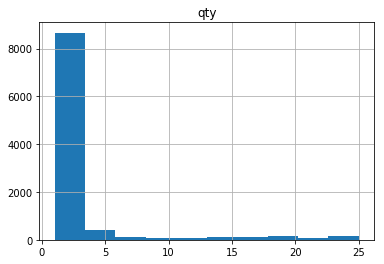

In [20]:
df.hist('qty')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f853bcdaa58>]],
      dtype=object)

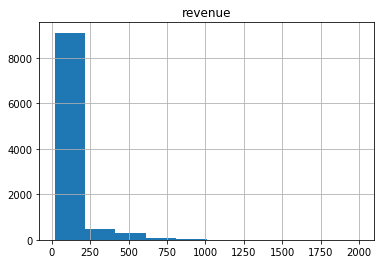

In [21]:
df.hist('revenue')

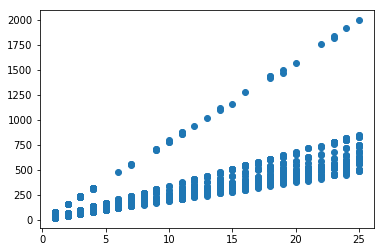

In [22]:
plt.scatter(df['qty'], df['revenue'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


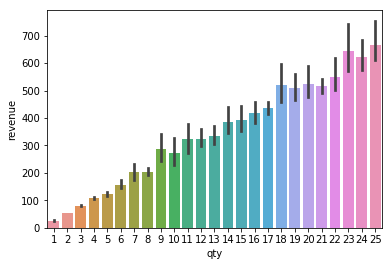

In [23]:
sns.barplot(df['qty'], df['revenue'])

In [24]:
min(df['qty']), max(df['qty'])

(1, 25)

In [25]:
df[['qty','revenue']].loc[df.reps == 'Aash'].sum()

qty         1135.00
revenue    29998.47
dtype: float64

In [26]:
reps = list(set(df['reps'].values))
len(reps)

72

In [27]:
rep_sales = {}

for rep in reps:
    rep_sales[rep] = int(df[['qty','revenue']].loc[df.reps == rep].sum()[1])

In [28]:
rep_sales

{'Kishen': 8898,
 'Mukesh': 7796,
 'Ranga': 11639,
 'Manju': 7863,
 'Prasad': 8923,
 'Chitra': 8506,
 'Bhat': 9187,
 'Pooja': 8293,
 'Akila': 7495,
 'Raji': 8940,
 'Seet': 35747,
 'Jagdish': 23634,
 'John': 12190,
 'Alka': 11464,
 'Reva': 7442,
 'Jay': 9486,
 'Santosh': 29801,
 'Kamat': 6536,
 'Anahit': 7376,
 'Sai': 24412,
 'Priya': 11710,
 'Ratna': 8211,
 'Venkat': 9256,
 'Rohini': 5440,
 'Javed': 7812,
 'Jaggi': 6675,
 'Bala': 10182,
 'Swami': 9755,
 'Easwar': 13949,
 'Rishi': 8032,
 'Chand': 8279,
 'Mak': 11491,
 'Ravi': 27448,
 'Nandini': 26569,
 'Nidhi': 8898,
 'Mala': 18600,
 'Aparna': 9260,
 'Chandra': 9016,
 'Meena': 8833,
 'Susan': 13302,
 'Keshab': 9267,
 'Hussain': 17006,
 'Bharath': 15478,
 'Kumar': 9214,
 'Vidya': 9054,
 'Sruti': 10723,
 'Palak': 10822,
 'Ananya': 18510,
 'Rahul': 8208,
 'Madhu': 8346,
 'Vijay': 8770,
 'Shaanth': 27692,
 'Satya': 10568,
 'Rachna': 28263,
 'Prarth': 6775,
 'Veeyes': 5623,
 'Sumedh': 11994,
 'Mehta': 13325,
 'Kishore': 11525,
 'Vish': 24834

In [29]:
pd.pivot_table(df, index=["region","reps","product"], aggfunc=np.sum)

qty  revenue
region reps   product              
East   Aash   Almond   102  2535.02
              Alpen    186  6217.75
              Beacon    48  1190.76
              Galaxy    30  2378.10
              Halls     17   319.11
              Jet      145  2861.58
              Mars     173  4012.66
              Milka    127  2876.64
              Orbit    103  2323.66
              Prince    82  2221.74
              Star      62  1288.15
              Trident   60  1773.30
       Anusha Almond    21   519.63
              Alpen     43  1444.32
              Beacon     6   148.13
              Galaxy     5   397.35
              Jet       48   955.40
              Mars      35   817.10
              Milka     18   407.47
              Orbit     11   249.69
              Prince     6   163.63
              Star      23   475.97
              Trident    8   237.60
       Durga  Almond    30   732.75
              Alpen     55  1838.38
              Beacon    14   344.51
              Galaxy     9   707.55
              Halls     11   205.68
              Jet       49   957.68
              Mars      16   371.31
...                    ...      ...
West   Suraj  Mars       6   137.71
              Milka     41   935.78
              Orbit     36   813.57
              Prince     8   217.26
              Star       9   187.11
              Trident   32   950.55
       Suresh Almond    84  2060.26
              Alpen    125  4204.10
              Beacon    27   667.25
              Galaxy     5   399.75
              Halls     29   545.69
              Jet       69  1358.77
              Mars      58  1343.41
              Milka    105  2380.14
              Orbit     76  1731.10
              Prince     9   245.44
              Star      79  1641.78
              Trident   42  1245.75
       Vidya  Almond    66  1642.88
              Alpen     42  1414.40
              Beacon    13   319.38
              Galaxy     7   555.65
              Halls      8   149.53
              Jet       29   576.05
              Mars      34   791.02
              Milka     18   408.51
              Orbit     16   363.30
              Prince    33   889.90
              Star      13   269.33
              Trident   56  1674.90

[858 rows x 2 columns]

In [30]:
def regionwise(region):
    return df[df['region'] == region].groupby('reps')['revenue'].apply(lambda x: x.sum())

sales_north = regionwise('North')
sales_east = regionwise('East')
sales_west = regionwise('West')
sales_south = regionwise('South')

sales_north, sales_east, sales_west, sales_south

(reps
 Ananya     18510.93
 Aparna      9260.05
 Chand       8279.43
 Kamat       6536.68
 Kishore    11525.99
 Mukund     10404.84
 Nandini    26569.57
 Pooja       8293.03
 Prarth      6775.08
 Prasad      8923.48
 Rachna     28263.75
 Rajat       9033.33
 Ranga      11639.45
 Ratna       8211.12
 Ravi       27448.79
 Rishi       8032.94
 Rohini      5440.15
 Sai        24412.79
 Sesh        6627.87
 Shaanth    27692.49
 Suman      17274.12
 Susan      13302.84
 Veeyes      5623.93
 Venkat      9256.03
 Vijay       8770.86
 Name: revenue, dtype: float64, reps
 Aash       29998.47
 Anusha      5816.29
 Durga       8505.90
 Hussain    17006.75
 Javed       7812.32
 Keshab      9267.94
 Kishen      8898.63
 Kumar       9214.13
 Madhu       8346.54
 Ram         5871.23
 Satya      10568.62
 Vish       24834.71
 Name: revenue, dtype: float64, reps
 Akila       7495.80
 Anahit      7376.05
 Bala       10182.97
 Chandra     9016.93
 Chitra      8506.26
 Easwar     13949.79
 Jagdish    23634

In [31]:
total_rep_rev = df.groupby('reps')['revenue'].apply(lambda x: x.sum())
total_rep_rev

reps
Aash       29998.47
Akila       7495.80
Alka       11464.96
Anahit      7376.05
Ananya     18510.93
Anusha      5816.29
Aparna      9260.05
Bala       10182.97
Bharath    15478.72
Bhat        9187.83
Chand       8279.43
Chandra     9016.93
Chitra      8506.26
Durga       8505.90
Easwar     13949.79
Hussain    17006.75
Jagdish    23634.13
Jaggi       6675.63
Javed       7812.32
Jay         9486.97
John       12190.87
Kamat       6536.68
Keshab      9267.94
Kishen      8898.63
Kishore    11525.99
Kumar       9214.13
Madhu       8346.54
Mak        11491.63
Mala       18600.60
Manju       7863.62
             ...   
Rahul       8208.32
Rajat       9033.33
Raji        8940.82
Ram         5871.23
Ranga      11639.45
Ratna       8211.12
Ravi       27448.79
Reva        7442.66
Rishi       8032.94
Rohini      5440.15
Sai        24412.79
Santosh    29801.71
Satya      10568.62
Satyen     11153.41
Seet       35747.41
Sesh        6627.87
Shaanth    27692.49
Sruti      10723.62
Suman      1727

In [32]:
rep_sales['Reva']

7442

In [33]:
df.groupby(['region']).revenue.count().sort_values(ascending=False)

region
North    3603
West     3029
East     1703
South    1665
Name: revenue, dtype: int64

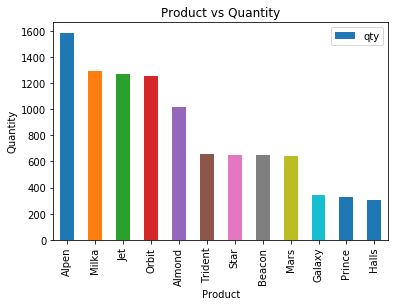

In [34]:
df.groupby(['product']).qty.count().sort_values(ascending=False).plot(kind='bar')
plt.title('Product vs Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.legend()

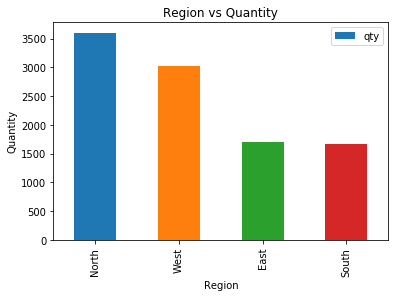

In [35]:
df.groupby(['region']).qty.count().sort_values(ascending=False).plot(kind='bar')
plt.title('Region vs Quantity')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.legend()

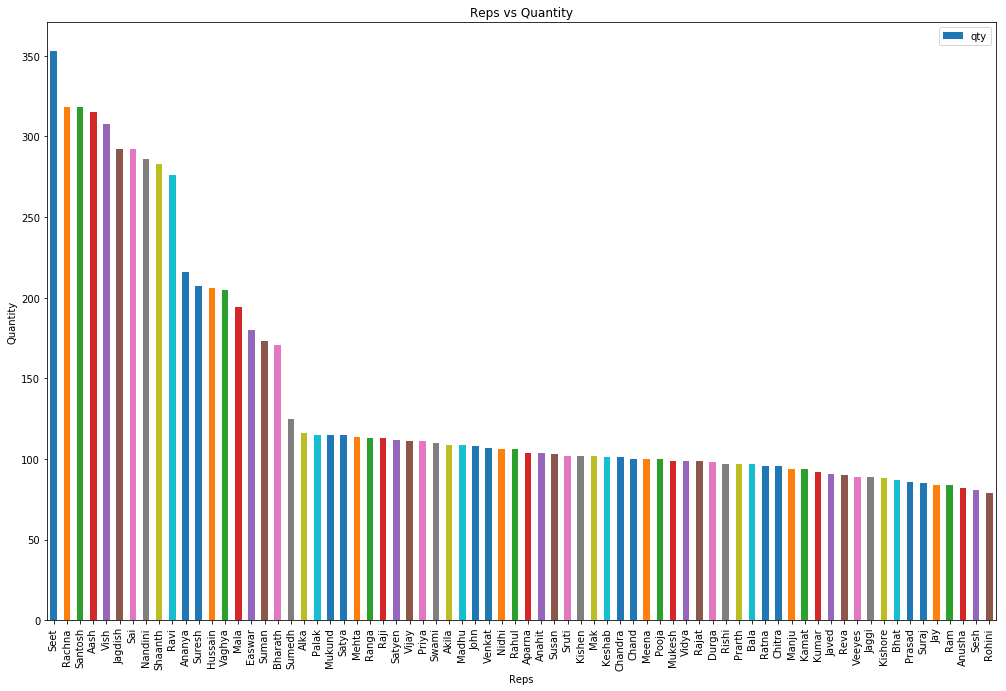

In [36]:
plt.figure(figsize=(17,11))
df.groupby(['reps']).qty.count().sort_values(ascending=False).plot(kind='bar')
plt.title('Reps vs Quantity')
plt.xlabel('Reps')
plt.ylabel('Quantity')
plt.legend()

In [37]:
df.head()

,reps,product,qty,revenue,region
8425,Mala,Galaxy,25,1998.75,West
4846,John,Galaxy,24,1918.80,West
3529,Kishore,Galaxy,23,1838.85,North
9590,Vijay,Galaxy,23,1820.46,North
1353,Jay,Galaxy,22,1758.90,South


In [38]:
corr = df.corr()
corr

,qty,revenue
qty,1.000000,0.895745
revenue,0.895745,1.000000


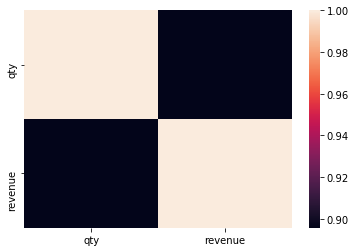

In [39]:
sns.heatmap(corr)

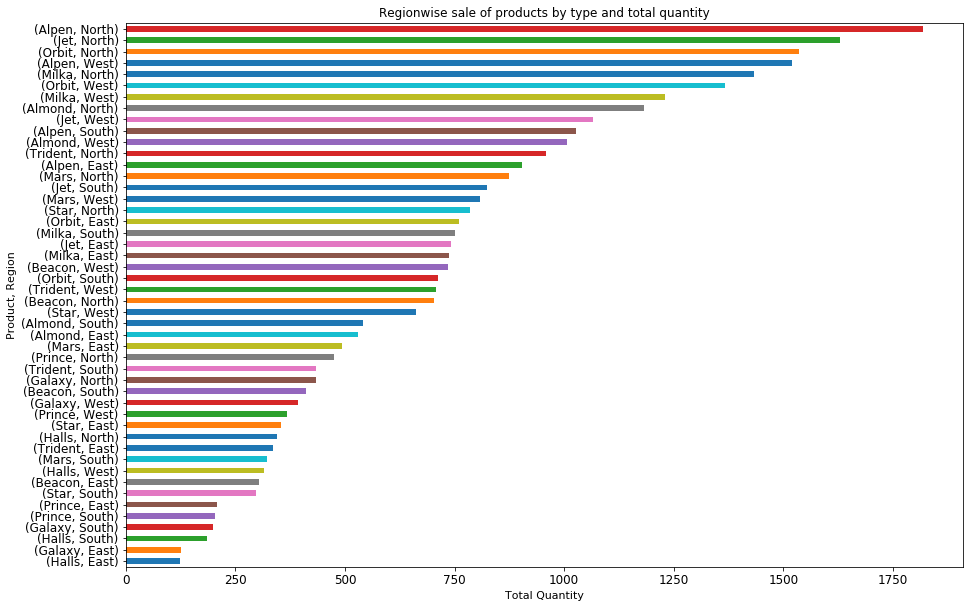

In [40]:
df.groupby(['product', 'region'])['qty'].apply(lambda x: x.sum()).sort_values(ascending=True).plot(kind='barh', fontsize=12,figsize=(15,10))
plt.title('Regionwise sale of products by type and total quantity')
plt.ylabel('Product, Region', fontsize=11)
plt.xlabel('Total Quantity', fontsize=11);

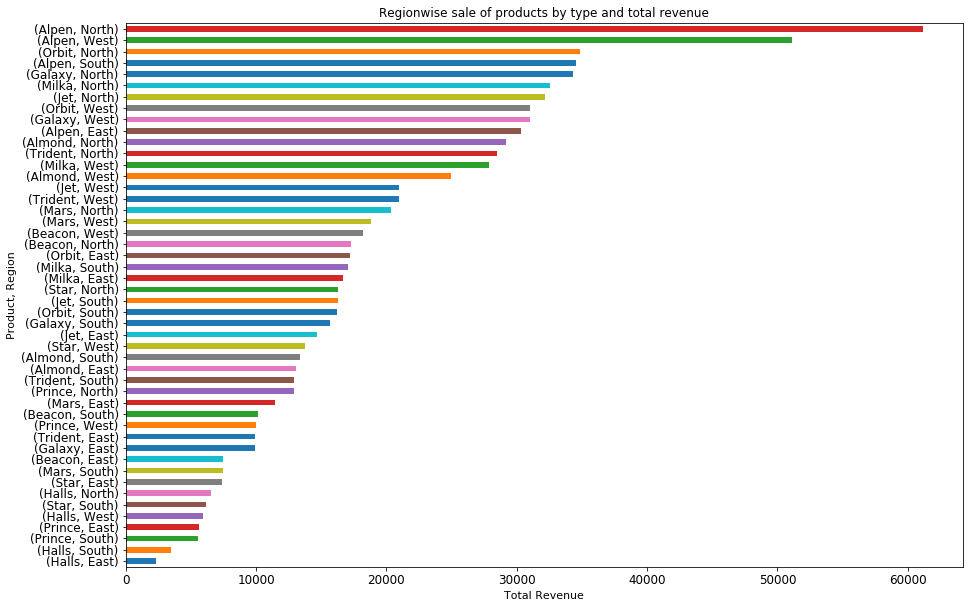

In [41]:
df.groupby(['product', 'region'])['revenue'].apply(lambda x: x.sum()).sort_values(ascending=True).plot(kind='barh', fontsize=12,figsize=(15,10))
plt.title('Regionwise sale of products by type and total revenue')
plt.ylabel('Product, Region', fontsize=11)
plt.xlabel('Total Revenue', fontsize=11);

**Heirarchical Clustering**

In [42]:
import time as time
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll

In [43]:
df = pd.concat([df, pd.get_dummies(df['region'])], axis=1)
df.head()

,reps,product,qty,revenue,region,East,North,South,West
8425,Mala,Galaxy,25,1998.75,West,0,0,0,1
4846,John,Galaxy,24,1918.80,West,0,0,0,1
3529,Kishore,Galaxy,23,1838.85,North,0,1,0,0
9590,Vijay,Galaxy,23,1820.46,North,0,1,0,0
1353,Jay,Galaxy,22,1758.90,South,0,0,1,0


In [44]:
X = df[['qty','revenue','East','North','West','South']].values
X.shape

(10000, 6)

In [ ]:
# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure(figsize=(21,13))
ax = p3.Axes3D(fig)
ax.view_init(37, -37)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], 
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=30, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)
plt.legend()

Compute unstructured hierarchical clustering...
